In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_profiling


ModuleNotFoundError: No module named 'pandas_profiling'

In [2]:
import urllib.request
url = 'https://data.gov.au/data/api/3/action/datastore_search?resource_id=bfa7ef04-e9f2-46ff-a959-84f005dfd17b&limit=5&q=title:jones'  
fileobj = urllib.request.urlopen(url)
print(fileobj.read())

b'{"help": "https://data.gov.au/data/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "resource_id": "bfa7ef04-e9f2-46ff-a959-84f005dfd17b", "fields": [{"type": "int", "id": "_id"}, {"type": "text", "id": "Occupation - unit group4"}, {"type": "text", "id": "State2"}, {"type": "numeric", "id": "Number of individuals"}, {"type": "numeric", "id": "Average taxable income3\\n$"}, {"type": "numeric", "id": "Median taxable income3\\n$"}, {"type": "numeric", "id": "Average salary or wage income3 \\n$"}, {"type": "numeric", "id": "Median salary or wage income3 \\n$"}, {"type": "numeric", "id": "Average total income3 \\n$"}, {"type": "numeric", "id": "Median total income3 \\n$"}], "records_format": "objects", "q": "title:jones", "records": [], "limit": 5, "_links": {"start": "/api/3/action/datastore_search?q=title%3Ajones&limit=5&resource_id=bfa7ef04-e9f2-46ff-a959-84f005dfd17b", "next": "/api/3/action/datastore_search?q=title%3Ajones&offset=5&lim

In [3]:
state_postcode_2017 = pd.read_excel('ts17snapshot07stateindividualsstatepostcodeoccupationstats.xlsx',skiprows = 3, sheet_name = 'Snapshot Table 7D')
state_postcode_2017.shape

(2691, 9)

In [4]:
state_postcode_2017.head()

,State/ Territory1,Postcode,Number of individuals no.,Taxable income or loss no.,Taxable income or loss $,Average taxable income or loss3 $,Median taxable income or loss3 $,Australian rank5 descending,Ranking5 by state/ territory descending
0,ACT,2600,5646,5646,576633168,102131,72304,52,2
1,ACT,2601,2820,2820,183152915,64948,46378,473,19
2,ACT,2602,19924,19924,1420069972,71274,58469,307,10
3,ACT,2603,6650,6650,734120641,110394,73838,41,1
4,ACT,2604,7984,7984,697715067,87389,71682,126,3


In [5]:
renatl_yearly_state = pd.read_excel('rental yearly statewise.xlsx', sheet_name = 'Individuals Table 26B', skiprows = 3)
renatl_yearly_state.shape

(72, 48)

In [6]:
renatl_yearly_state['Year'] = pd.to_datetime(renatl_yearly_state['Income Year3'].apply(lambda x: x.split('–')[0]))
renatl_yearly_state['Average_rent'] = renatl_yearly_state['Rental Income \n$']/renatl_yearly_state['Rental Property Schedules4 \nno.']
renatl_yearly_state.head()

,Income Year3,State / Territory of rental property1,Net rent position2,Rental Property Schedules4 no.,Rental Income no.,Rental Income $,Other Rental Income no.,Other Rental Income $,Advertising for Tenants no.,Advertising for Tenants $,...,Water charges no.,Water charges $,Sundry rental expenses no.,Sundry rental expenses $,Capital works deduction no.,Capital works deduction $,Net rental income no.,Net rental income $,Year,Average_rent
0,2016–17,NSW,Loss,474939,457478,6407286709,124033,56246305,60947,15784521,...,405736,215911972,280474,192789183,241004,662743633,474939,-3094830622,2016-01-01,13490.757148
1,2016–17,NSW,Neutral/Profit,487633,487342,9535972492,137138,93969282,44447,12136454,...,408137,263530821,259318,158251240,160200,333742604,485810,4116796622,2016-01-01,19555.634036
2,2016–17,QLD,Loss,512700,497149,5775556187,115538,54337736,84515,24341699,...,353835,248733062,292151,200876190,321295,819316519,512700,-3443225906,2016-01-01,11264.981835
3,2016–17,QLD,Neutral/Profit,243118,242818,3756249027,46379,40884950,25498,10657790,...,162795,134754842,115674,99762072,96241,162820324,241855,1352202484,2016-01-01,15450.312305
4,2016–17,VIC,Loss,447467,431341,4875302379,24360,23996920,80392,20078867,...,406734,192928515,243870,157928994,235135,613334523,447467,-2852279826,2016-01-01,10895.333911


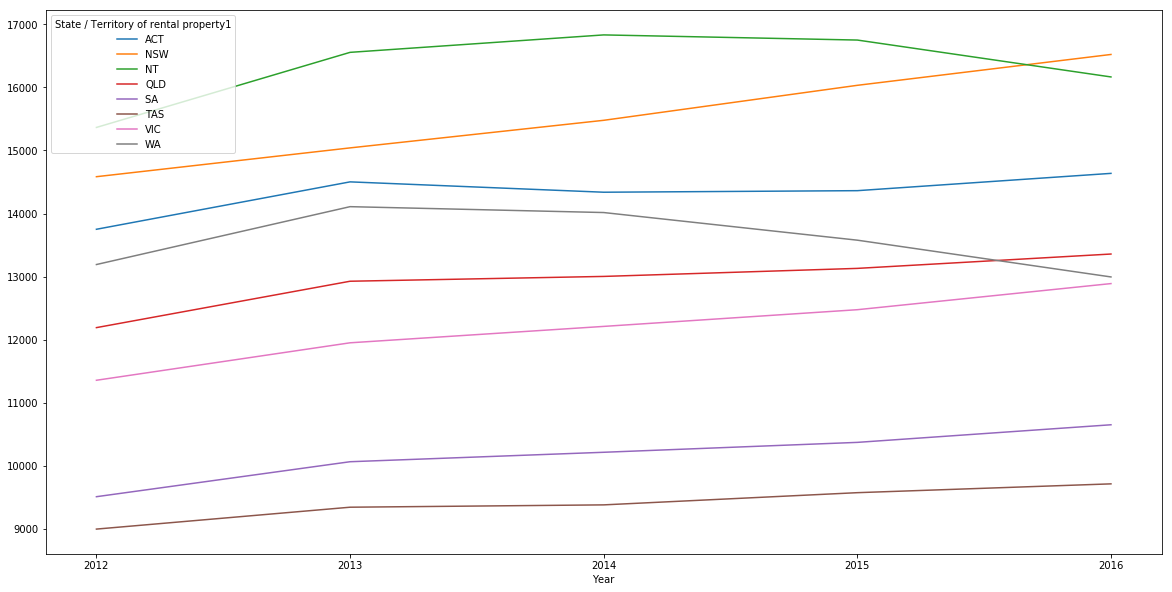

In [135]:
average_rents = renatl_yearly_state.groupby(['Year','State / Territory of rental property1'])['Average_rent'].mean().unstack()
average_rents.plot(figsize = (20,10))

In [136]:
average_rents = average_rents.T.reset_index()

In [139]:
average_rents.melt(id_vars = 'State / Territory of rental property1', value_name = 'Average Rents Per Year Per Person').to_csv('average_rents.csv')

In [20]:
train = average_rents[['NSW']].iloc[:4]
train
test = average_rents[['NSW']].iloc[3:]

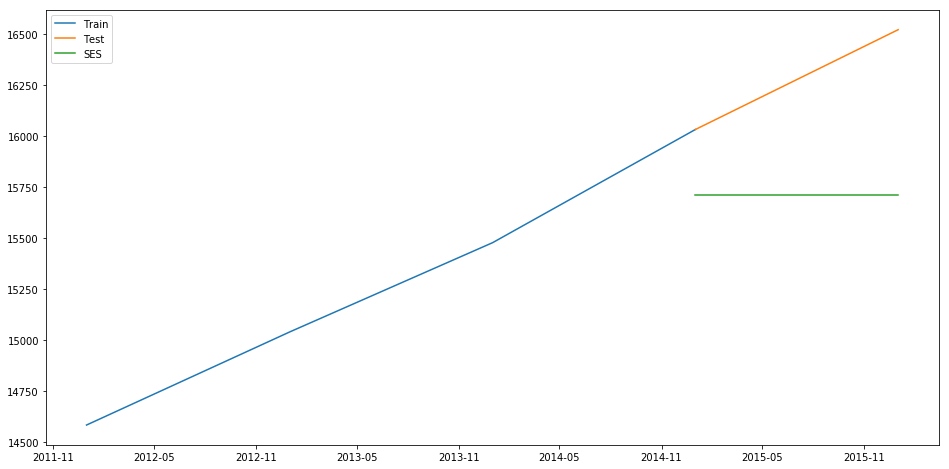

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['NSW'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['NSW'], label='Train')
plt.plot(test['NSW'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

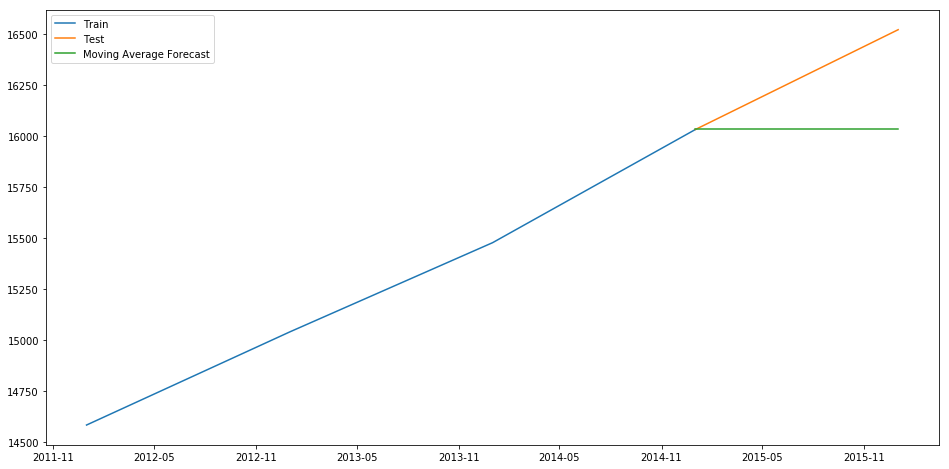

In [25]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['NSW'].rolling(1).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['NSW'], label='Train')
plt.plot(test['NSW'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

C:\Users\MeAmit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


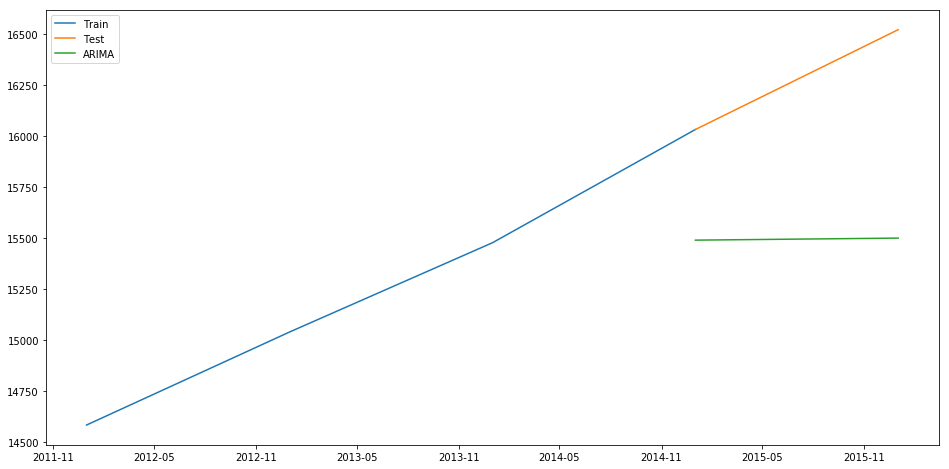

In [46]:
import statsmodels as sm

y_hat_avg = test.copy()
fit1 = sm.tsa.arima_model.ARIMA(average_rents[['NSW']].iloc[:5], order=(1,0,0)).fit()
y_hat_avg['ARIMA'] = fit1.predict(start="2015-01-01", end="2016-01-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['NSW'], label='Train')
plt.plot(test['NSW'], label='Test')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [44]:
average_rents[['NSW']].iloc[:4]

State / Territory of rental property1,NSW
Year,
2012-01-01,14584.244317
2013-01-01,15041.138866
2014-01-01,15478.682532
2015-01-01,16033.687965


In [73]:
#Property interests
property_interest = pd.read_excel('property interests yearly.xlsx', sheet_name = 'Individuals Table 27C', skiprows = 2, parse_dates = ['Income year2'])
property_interest.shape

(978, 4)

In [74]:
property_interest['num_interests'] = property_interest['Number of property interests1'].apply(lambda x: int(x.split()[0]))
property_interest['total_interests'] = property_interest['Number of individuals'] * property_interest['num_interests']
property_interest.head()

,Income year2,Number of property interests1,State or territory4,Number of individuals,num_interests,total_interests
0,2000-01-01,1 interest,ACT,18834,1,18834
1,2000-01-01,1 interest,NSW,317052,1,317052
2,2000-01-01,1 interest,NT,10991,1,10991
3,2000-01-01,1 interest,QLD,177340,1,177340
4,2000-01-01,1 interest,SA,58696,1,58696


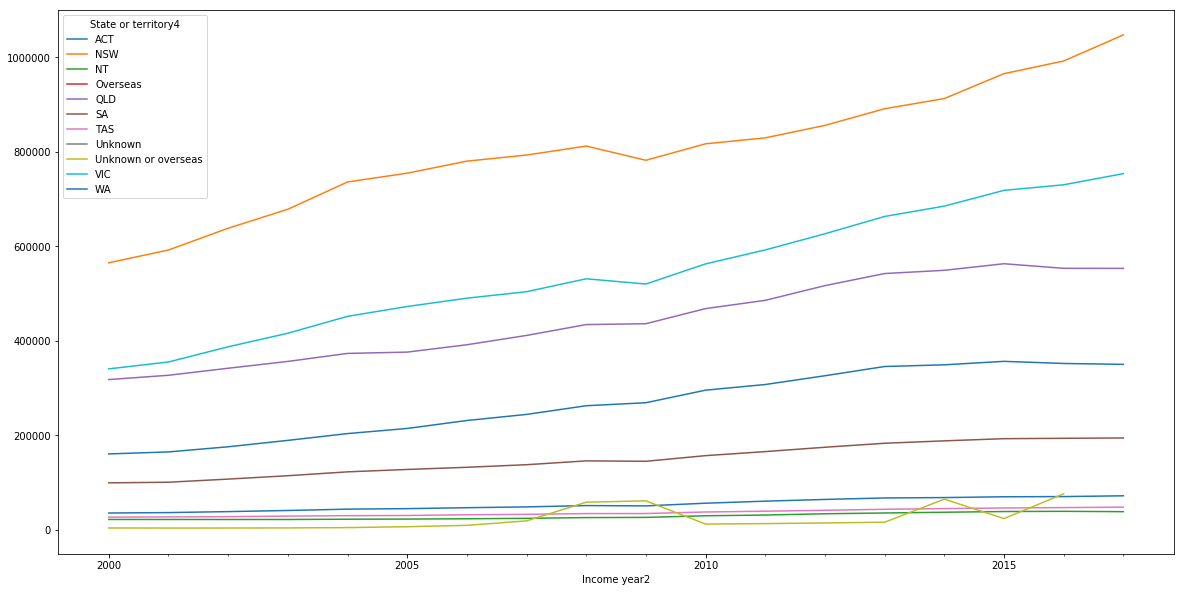

In [75]:
state_year_interests = property_interest.groupby(['Income year2','State or territory4'])['total_interests'].sum().unstack()
state_year_interests.plot(figsize = (20,10))

C:\Users\MeAmit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


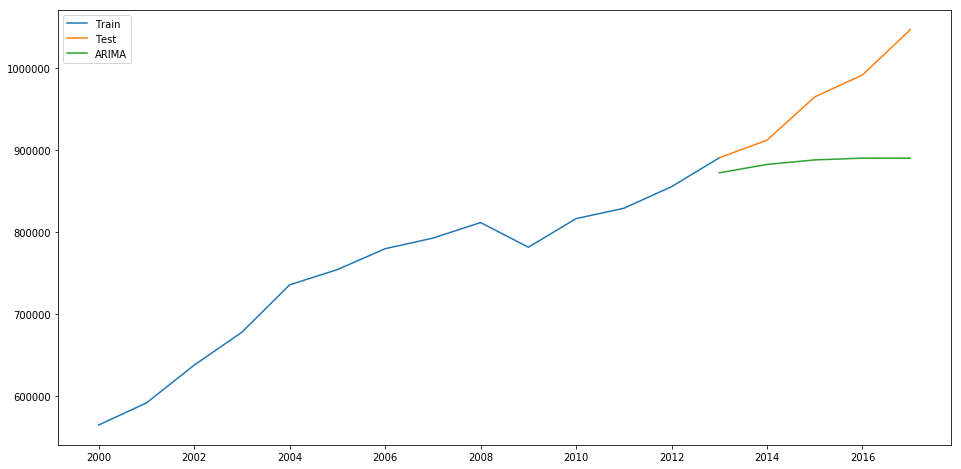

In [86]:
train = state_year_interests[['NSW']].iloc[:14]
train
test = state_year_interests[['NSW']].iloc[13:]

y_hat_avg = test.copy()
fit1 = sm.tsa.arima_model.ARIMA(state_year_interests[['NSW']], order=(2,0,0)).fit()
y_hat_avg['ARIMA'] = fit1.predict(start="2013-01-01", end="2019-01-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['NSW'], label='Train')
plt.plot(test['NSW'], label='Test')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [70]:
state_year_interests[['NSW']].iloc[:14]

State or territory4,NSW
Income year2,
2000,564607.0
2001,591625.0
2002,637680.0
2003,677864.0
2004,735557.0
2005,754246.0
2006,779690.0
2007,792577.0
2008,811589.0


In [141]:
state_year_interests = state_year_interests.T.reset_index()
state_year_interests.melt(id_vars = 'State or territory4', value_name = 'Number of Interests in Year').to_csv('rental interests.csv', index = False)

In [87]:
occupation_income_states = pd.read_excel('occupation types and incomes.xlsx', sheet_name = 'Snapshot Table 7E', skiprows = 3)
occupation_income_states.shape

(3421, 9)

In [88]:
occupation_income_states.head()

,Occupation - unit group4,State2,Number of individuals,Average taxable income3 $,Median taxable income3 $,Average salary or wage income3 $,Median salary or wage income3 $,Average total income3 $,Median total income3 $
0,1100 Manager or director - type not specified,ACT,8,95253.88,73319.0,31478.83,23301.5,99104.25,88221.0
1,1100 Manager or director - type not specified,NSW,324,90415.67,62767.0,25976.69,15343.0,94002.58,65588.5
2,1100 Manager or director - type not specified,QLD,103,74627.85,58464.0,18761.49,15391.0,77572.01,60330.0
3,1100 Manager or director - type not specified,SA,53,69992.25,59226.0,18215.65,12470.5,74540.87,64331.0
4,1100 Manager or director - type not specified,TAS,7,98463.14,77105.0,28301.29,17050.0,99120.14,77105.0


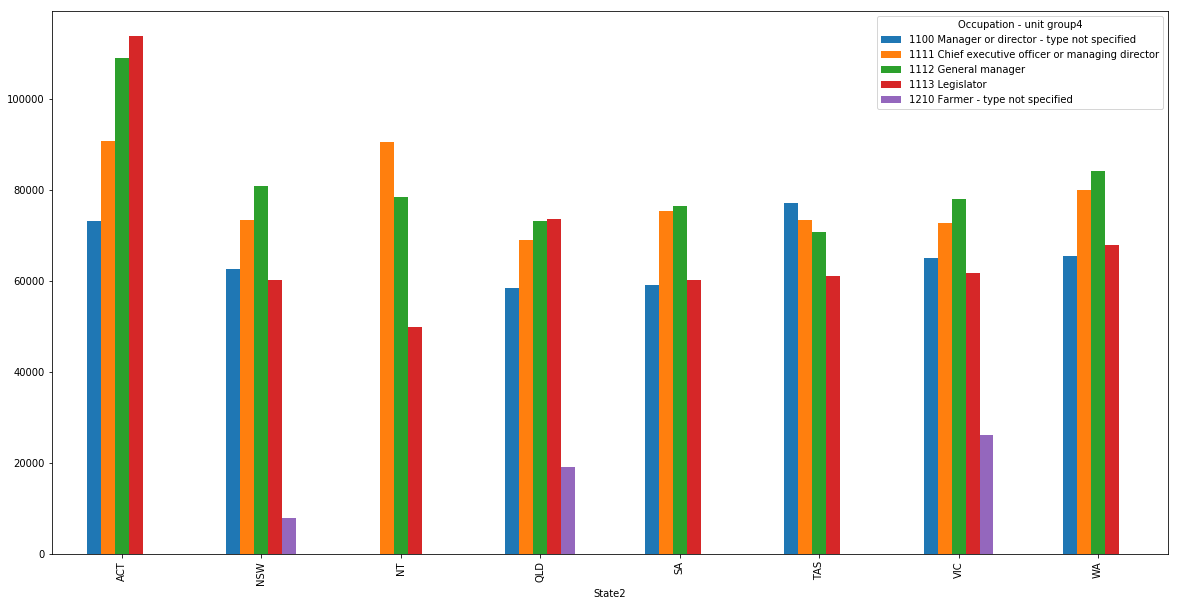

In [98]:
median_incomes_state_occupation = occupation_income_states[occupation_income_states['Occupation - unit group4'].isin(occupation_income_states['Occupation - unit group4'].unique()[:5])].groupby(['State2','Occupation - unit group4'])['Median taxable income3\n$'].median().unstack()
median_incomes_state_occupation.plot(kind = 'bar',figsize = (20,10))

In [100]:
median_incomes_state_occupation.to_csv('median_incomes_state_occupation.csv', index = False)

In [119]:
median_incomes = occupation_income_states.groupby(['State2','Occupation - unit group4'])['Median taxable income3\n$'].median().unstack()

In [122]:
median_incomes.reset_index(inplace = True)
median_incomes

Occupation - unit group4,State2,1100 Manager or director - type not specified,1111 Chief executive officer or managing director,1112 General manager,1113 Legislator,1210 Farmer - type not specified,1211 Aquaculture farmer,1212 Crop farmer,1213 Livestock farmer,1214 Mixed crop and livestock farmer,...,9612 Consultant - real estate representative,9621 Consultant - sales assistant (retail),9712 Apprentice or trainee - miner,9730 Apprentice or trainee - transport and distribution driver,9741 Apprentice or trainee - storeperson,9811 Apprentice or trainee - cleaning services,"9831 Apprentice or trainee - food, drink or meat processor","9841 Apprentice or trainee - farm, forestry or garden worker","9899 Apprentice or trainee - deck or fishing hand, or autoglazier",9997 Miscellaneous type not specified
0,ACT,73319.0,90808.5,108994.0,113799.0,NaN,66050.0,39538.0,44109.0,NaN,...,57068.0,22856.5,NaN,NaN,14176.0,24170.5,NaN,NaN,NaN,89903.0
1,NSW,62767.0,73376.0,80831.0,60172.5,7954.0,32464.0,44745.5,47442.5,53222.5,...,53866.5,24228.0,52352.0,25017.0,24336.0,20454.5,16186.0,17095.0,33217.0,62003.0
2,NT,NaN,90536.0,78557.0,50008.0,NaN,60107.0,32726.0,54698.5,27367.5,...,54430.0,27450.0,NaN,NaN,22238.0,15500.5,NaN,14125.0,32793.0,43053.5
3,QLD,58464.0,68986.5,73247.0,73583.5,19209.0,25841.0,44016.0,46857.0,52085.5,...,48881.5,24805.0,45760.0,25976.0,24503.0,20700.0,22324.0,14701.0,27784.0,56662.0
4,SA,59226.0,75331.5,76577.0,60287.0,NaN,39172.0,45590.0,49678.0,53247.0,...,53984.0,26408.0,57058.0,28739.5,11064.5,24003.0,9602.0,14566.0,45122.5,67191.0
5,TAS,77105.0,73536.0,70917.0,61134.0,NaN,58584.0,44695.0,47794.0,44221.0,...,46530.0,24110.0,NaN,40196.0,23941.5,20982.0,38594.5,16139.5,20900.0,50067.0
6,VIC,65164.5,72739.0,78130.0,61885.0,26140.5,32478.0,44195.0,45617.0,47802.0,...,45688.0,25548.0,82151.0,19299.0,17779.0,20028.0,16231.0,18921.0,29716.0,62582.5
7,WA,65585.0,80057.0,84236.5,68048.0,NaN,40835.5,47816.0,53401.5,59515.0,...,55353.5,24546.0,53353.0,17910.5,14960.5,20387.0,21108.5,17493.0,31841.5,64775.0


In [126]:
median_incomes.melt(id_vars='State2', value_name = 'Median Income per Year').to_csv('median incomes per state per occupation.csv')